<a href="https://colab.research.google.com/github/anniseraa/fsd/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Fertika Indri Dhamaningrum 24523160
*   Annisa Ramdhani 24523018

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub
import pandas as pd
import os

dataset_id = "uciml/pima-indians-diabetes-database"
version = None
destination_path = "./diabetes_data"
print(f"Mengunduh dataset: {dataset_id}")

download_path = kagglehub.dataset_download(dataset_id, version)

# nomor 1
for root, dirs, files in os.walk(download_path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            print(f"Found CSV file: {csv_path}")
            break # Assuming there's only one CSV file in the dataset
    if 'csv_path' in locals():
        break # Stop searching once a CSV is found

if 'csv_path' in locals():
    df = pd.read_csv(csv_path)
    print("\nFirst 5 rows of the DataFrame:")
    display(df.head())
else:
    print("No CSV file found in the downloaded dataset.")

Mengunduh dataset: uciml/pima-indians-diabetes-database
Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Found CSV file: /kaggle/input/pima-indians-diabetes-database/diabetes.csv

First 5 rows of the DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# nomor 2

# Asumsi kolom target adalah 'Outcome' (atau ganti dengan nama kolom target Anda)
X = df.drop('Outcome', axis=1) # Fitur
y = df['Outcome']              # Target (0: Tidak Diabetes, 1: Diabetes)

# Membagi data menjadi Training dan Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Pelatihan Model ---
model = LogisticRegression(solver='liblinear', random_state=42) # solver='liblinear' cocok untuk dataset kecil
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

print("==============================================")
print("      Classification Report (Kinerja Model)     ")
print("==============================================")
print(classification_report(y_test, y_pred, target_names=['Tidak Diabetes (0)', 'Diabetes (1)']))

      Classification Report (Kinerja Model)     
                    precision    recall  f1-score   support

Tidak Diabetes (0)       0.76      0.87      0.81       150
      Diabetes (1)       0.67      0.48      0.56        81

          accuracy                           0.74       231
         macro avg       0.71      0.68      0.69       231
      weighted avg       0.73      0.74      0.72       231



<Figure size 800x600 with 0 Axes>

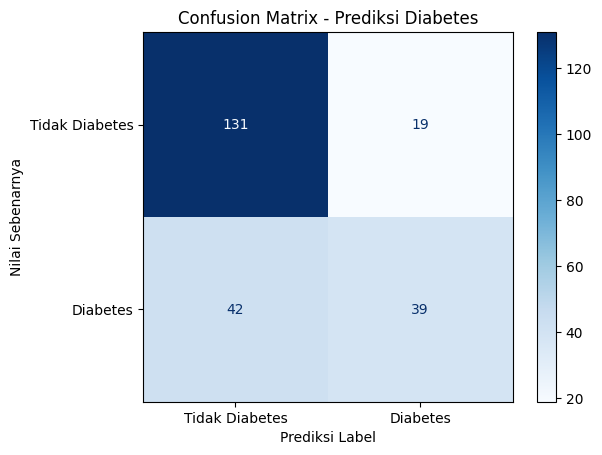

In [ ]:
# nomor 3
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Diabetes', 'Diabetes'])

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Prediksi Diabetes')
plt.xlabel('Prediksi Label') # Label sumbu X yang jelas
plt.ylabel('Nilai Sebenarnya') # Label sumbu Y yang jelas
plt.show()

In [ ]:
# nomor 4
# Buat DataFrame untuk perbandingan
perbandingan = pd.DataFrame({'Nilai Sebenarnya (y_test)': y_test,
                             'Hasil Prediksi (y_pred)': y_pred})

print("\n==============================================")
print("     5 Baris Pertama Perbandingan Prediksi      ")
print("==============================================")
print(perbandingan.head())


     5 Baris Pertama Perbandingan Prediksi      
     Nilai Sebenarnya (y_test)  Hasil Prediksi (y_pred)
730                          1                        0
198                          1                        0
24                           1                        1
417                          1                        1
387                          1                        0


Accuracy (0.74): Secara keseluruhan, model  benar dalam memprediksi sekitar 74% kasus (baik yang diabetes maupun tidak diabetes).
Precision (Kelas 1 - Diabetes: 0.67): Dari semua kasus yang diprediksi sebagai diabetes, sekitar 67% di antaranya benar-benar diabetes. Ini berarti ada cukup banyak "false positive" (orang yang diprediksi diabetes tapi ternyata tidak).
Recall (Kelas 1 - Diabetes: 0.48): Dari semua kasus diabetes yang sebenarnya, model hanya berhasil mengidentifikasi sekitar 48% di antaranya. Ini menunjukkan model masih kesulitan mendeteksi banyak kasus diabetes yang sebenarnya ("false negative" cukup tinggi).
F1-score (Kelas 1 - Diabetes: 0.56): F1-score adalah rata-rata harmonik dari precision dan recall. Nilai 0.56 menunjukkan keseimbangan antara precision dan recall untuk kelas diabetes, yang mengindikasikan ada ruang perbaikan dalam kedua metrik tersebut.
Precision (Kelas 0 - Tidak Diabetes: 0.76): Dari semua kasus yang diprediksi sebagai tidak diabetes, sekitar 76% di antaranya benar-benar tidak diabetes.
Recall (Kelas 0 - Tidak Diabetes: 0.87): Dari semua kasus tidak diabetes yang sebenarnya, model berhasil mengidentifikasi sekitar 87% di antaranya. Model bekerja lebih baik dalam mengidentifikasi individu yang tidak menderita diabetes.
Penjelasan Confusion Matrix dalam Konteks Deteksi Diabetes:

True Positive (TP): Jumlah kasus yang sebenarnya diabetes dan berhasil diprediksi dengan benar sebagai diabetes.
False Positive (FP): Jumlah kasus yang sebenarnya tidak diabetes tetapi salah diprediksi sebagai diabetes. Ini adalah "alarm palsu".
True Negative (TN): Jumlah kasus yang sebenarnya tidak diabetes dan berhasil diprediksi dengan benar sebagai tidak diabetes.
False Negative (FN): Jumlah kasus yang sebenarnya diabetes tetapi salah diprediksi sebagai tidak diabetes. Ini adalah kegagalan mendeteksi kasus diabetes yang sebenarnya.
Kesimpulan Kinerja Model Logistic Regression: Model Logistic Regression ini menunjukkan kinerja yang moderat dalam memprediksi diabetes berdasarkan dataset yang digunakan. Model cukup baik dalam mengidentifikasi individu yang tidak menderita diabetes (recall kelas 0 tinggi). Namun, model memiliki keterbatasan signifikan dalam mendeteksi individu yang benar-benar menderita diabetes (recall kelas 1 rendah). Tingginya jumlah False Negative (kasus diabetes yang tidak terdeteksi) merupakan area kritis untuk perbaikan, terutama dalam aplikasi medis di mana mendeteksi penyakit sangat penting. Precision yang moderat untuk kelas diabetes juga menunjukkan adanya prediksi positif palsu yang cukup sering terjadi.

Secara keseluruhan, model ini bisa menjadi titik awal, tetapi perlu dioptimalkan atau dipertimbangkan teknik pemodelan lain untuk meningkatkan kemampuannya dalam mendeteksi kasus diabetes yang sebenarnya.

